# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

table = pd.read_excel("GSAF5.xls") #load the file

blank = table.isna().sum() #checking the sum of blank values
print(table.shape) #getting the dimensions
print(blank)
#if any of number of blanks in a column is equal to the number of rows, then all data in that column in blank
names = table.columns
#get rid of the last two columns that do not contain any data
names = names[:len(names)-2]
table = table[names]
print(table.shape)



(6992, 23)
Date                 0
Year                 2
Type                18
Country             50
State              482
Location           565
Activity           585
Name               219
Sex                579
Age               2994
Injury              35
Fatal Y/N          561
Time              3526
Species           3132
Source              19
pdf                193
href formula       198
href               196
Case Number        194
Case Number.1      195
original order     193
Unnamed: 21       6991
Unnamed: 22       6990
dtype: int64
(6992, 21)


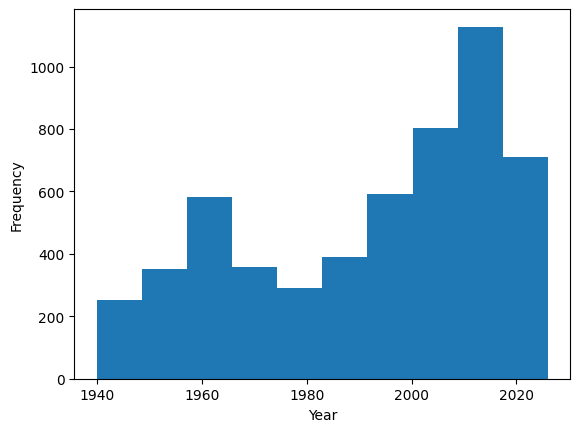

In [63]:

#get rid of any rows where Year is blank and cast to an int
table.dropna(subset = ["Year"], inplace = True)
table["Year"] = table["Year"].astype("int")
#There are many years included, mainly starting in the 1800's and ending at present day. There are some that have an unknown year (0) or are extremely old
table["Year"].unique()
#get rid of all rows where the date is before 1940
table = table[table["Year"]>=1940]
#create a plot
plt.hist(table["Year"])
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

The histogram for frequency of shark attacks based on year shows that shark attacks have generally increased throughout the decades. There have been some dips, such as in the 80's. There is also a dip for the 2020's, but that is likely because the decade is only halfway through

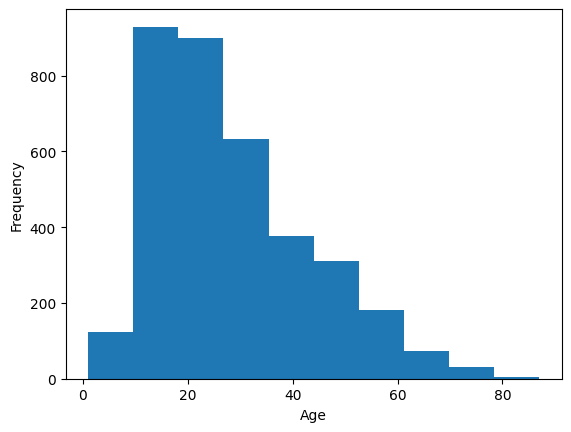

In [64]:

table["Age"].unique()
#change the age column to a numeric, this will turn any strings such as "28" into numerics
table["Age"] = pd.to_numeric(table["Age"], errors = "coerce")
#drop null values
table.dropna(subset = ["Age"], inplace = True)
#cast back to int
table["Age"] = table["Age"].astype("int")
plt.hist(table["Age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [65]:

table.dropna(subset = ["Sex"], inplace = True)
table["Sex"] = table["Sex"].str.strip()
table = table[table['Sex'].isin(['M', 'F'])]
print(table["Sex"].value_counts(normalize = True))

Sex
M    0.845434
F    0.154566
Name: proportion, dtype: float64




```
The proportion of males in this dataset is 0.845
```



In [66]:
#Provoked and Unprovoked and Unknown

#table["Type"].unique()
table["Type"] = table["Type"].replace(["Invalid", "Watercraft", "Questionable", "Sea Disaster", "Sea Disaster", "?", "Under investigation"], "Unknown")
table.dropna(subset = ["Type"], inplace = True)
table["Type"].unique()
print(table["Type"].value_counts(normalize = True))
print(table.shape)

Type
Unprovoked    0.834518
Unknown       0.084163
Provoked      0.081319
Name: proportion, dtype: float64
(3517, 21)


The proportion of attacks that are unprovoked is 0.834

In [67]:

table["Fatal Y/N"] = table["Fatal Y/N"].replace(["F", "M", 2017, "UNKNOWN", " N"], "Unknown")
table.dropna(subset = ["Fatal Y/N"], inplace = True)
print(table["Fatal Y/N"].unique())


['N' 'Y' 'Unknown']


In [68]:
pd.crosstab(table['Type'], table['Sex'], normalize = True)

Sex,F,M
Type,,
Provoked,0.006323,0.079494
Unknown,0.004216,0.028305
Unprovoked,0.142728,0.738934




```
Sharks are more likely to attack Men (0.14) unprokoved rather than Women (0.74) due to the large difference in proportions.
```



In [69]:
pd.crosstab(table['Type'], table['Fatal Y/N'], normalize = True)

Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,0.082806,0.000903,0.002108
Unknown,0.023788,0.000602,0.008130
Unprovoked,0.733815,0.004216,0.143631


When the attack is unprovoked, it is more likely to not be fatal (0.73) rather than fatal (0.14). When the attack is provoked, it is more likely to not be fatal (0.083) rather than fatal (0.0021).

In [70]:
pd.crosstab(table['Sex'], table['Fatal Y/N'], normalize = True)

Fatal Y/N,N,Unknown,Y
Sex,,,
F,0.130684,0.000602,0.021981
M,0.709726,0.005119,0.131888


When the attack is on a male, it is more likely to not be fatal (0.71) rather than fatal (0.13). When the attack is on a female, it is more likely to not be fatal (0.13) rather than fatal (0.021).

I generally think sharks interesting animals. Like most animals, I think there would be less problems/fear around them if we left them alone most of the time instead of bothering them in their natural habitat.


In [74]:
print(table ["Species "])
sharks = table["Species "]
sharks = sharks.str.split(" ")
print(sharks)


0                                   Not stated
1                                Bronze whaler
2                                   Not stated
3               Reportedly Tiger or Bull shark
4       Great White Shart estimated 4.8m 16 ft
                         ...                  
5448                                       NaN
5449                           "a small shark"
5450                           3 m [10'] shark
5451                                       NaN
5452                          2.4 m [8'] shark
Name: Species , Length: 3321, dtype: object
0                                        [Not, stated]
1                                     [Bronze, whaler]
2                                        [Not, stated]
3                 [Reportedly, Tiger, or, Bull, shark]
4       [Great, White, Shart, estimated, 4.8m, 16, ft]
                             ...                      
5448                                               NaN
5449                               ["a, small, shark"]

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?